# Project : TMDb Box Office Prediction


###  Description :

<p>TMDb is a place to gain and share knowledge—about Movies. It’s a platform to ask questions and Give reviews about the movies to the people who contribute unique insights and quality answers. This empowers people to learn from each other & to better understand the world of movies.</p>
<p>Over 50 million people visit <a href="https://www.themoviedb.org/">TMDB </a>every month.
<br>
<br>
In a world where movies made an estimated $41.7 billion in 2020, the film industry is more popular than ever. 
But what movies make the most money at the box office? 
How much does a director matter? 
Or the budget?

__ Problem Statement __
- Can we predict a movie's worldwide box office revenue?
- Can we predict a movieis going to be hit or flof?
- Identify which factor of movie making process helping more to gain much profit ?
- What are the things that need to be take care inorder to make a successful movie in 2020 ? 

### Real world Business Objectives and Constraints:

1. The cost of making a Successful movie.
2. Runtime.
3. number of actor

## Data Analysis Problem:

### Data overview:

<p> 
- Data will be in a file tmdb_movies_data.csv <br>
- tmdb_movies_data.csv contains 21 columns : 
    <P>'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'`
     <p>
     <br>
- Size of tmdb_movies_data.csv - 7MB <br>
- Number of rows in tmdb_movies_data.csv = 10866
</p>

### Table of Contents
     --> Introduction
     --> Data Wrangling
     --> Exploratory Data Analysis
     --> Conclusions

### Introduction :-
  This data set contains information about 10,000 movies collected from The       Movie Database (TMDb), including user ratings and revenue.

In [2]:
#Importing the Libraries
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt

### Data Wrangling :-

#### General Properties 

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
# loading the csv file and storing it in the variable "tmdb_data"
df = pd.read_csv(r"C:\\Users\\HP\\Downloads\\tmdb-movies-dataset\\tmdb_movies_data.csv")

# printing first five rows with defined columns of tmdb-movies database

df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
# Scanning the dataframe for incorrect datatypes and missing Values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Scanning the Dataframe for Null Values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# Scanning the dataframe for duplicate values
df.duplicated().any()

True

In [7]:
df.shape

(10866, 21)

In [8]:
# Searching for 0's in dataframe
y = df.query('budget == 0').shape
print('Number of Rows with "0" value in budget column : {}'.format(y[0]))

Number of Rows with "0" value in budget column : 5696


In [9]:
# Searching for 0's in dataframe
y = df.query('revenue == 0').shape
print('Number of Rows with "0" value in revenue column : {}'.format(y[0]))

Number of Rows with "0" value in revenue column : 6016


In [10]:
# Searching for 0's in dataframe
y = df.query('runtime == 0').shape
print('Number of Rows with "0" value in runtime column : {}'.format(y[0]))

Number of Rows with "0" value in runtime column : 31


#### Data Cleaning
  problem with the Dataframe

##### 1. Removing Unnecessary Cloumns

In [11]:
#Selecting the columns needed to drop
col_del = ['id','imdb_id','popularity','homepage','keywords','overview','tagline','budget_adj','revenue_adj']
# Droping the columns
df.drop(col_del,axis = 1,inplace = True)
# Checking the columns
df.columns

Index(['budget', 'revenue', 'original_title', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

#### 2. Converting All Zeroes into Null Values

In [12]:
# Selecting the columns
col_del = ['budget','revenue','runtime']

# Replacing the values
df[col_del] = df[col_del].replace(to_replace = 0,value = np.NaN)

# Checking for any 0's
df.query('budget == 0' or 'revenue == 0' or 'runtime == 0')

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


#### 3.Drop the Null Values

In [13]:
# Droping the Null Values for the selected columns
df.dropna(subset = col_del,inplace = True)

# Droping the Null Values for all the columns
df.dropna(inplace = True)

# Checking for any Null Values
df.isnull().sum()

budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

#### 4. Duplicate Rows

In [14]:
# Droping the Duplicate Rows
df.drop_duplicates(inplace = True)

# Checking for any Duplicate rows
df.duplicated().any()

False

#### 5. Remodelling the datatype of column

In [15]:
# Changing the Datatype
df['release_date'] = pd.to_datetime(df['release_date'])
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)

# Checking the status
df.head(2)

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


#### 6. Renaming the columns


In [16]:
# Renaming the columns
df.rename(columns = {'budget' : 'budget(in $)','revenue' : 'revenue(in $)'},inplace = True)

# Checking the columns
df.head(0)

,budget(in $),revenue(in $),original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [17]:
# Getting Shape of dataframe
y = df.shape
print("Total No of Row :{}\nTotal No of Columns:{}".format(y[0],y[1]))

Total No of Row :3805
Total No of Columns:12


#### cleaning process Conclusion:-
Our Cleanning process has been completed.We can see, Before We've Total 10866 rows and
21 columns And Now,After Cleaning the data, Now We've Total No of Rows:3805 and
Columns:12


## Exploratory Data Analysis :-
Before starting our EDA I will like to add one more columns i.e profit which is one of the major column for perfect Analysis.

In [18]:
# Inserting the new column 'Profit'
df.insert(2,'profit',df['revenue(in $)'] - df['budget(in $)'])

# Checking the columns
df.head(3)

,budget(in $),revenue(in $),profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015


### General Questions

#### Which is the Least and Most Profitable Movie?

In [19]:
# Function for Easy Code
def high_low(col):

 #taking the index value of the highest number in profit column
 high_id = df[col].idxmax()
 #calling by index number,storing that row info to a variable
 high = pd.DataFrame(df.loc[high_id])

 #taking the index value of the least number in profit column
 low_id = df[col].idxmin()
 #calling by index number,storing that row info to a variable
 low = pd.DataFrame(df.loc[low_id])

 #concatenating two dataframes
 res = pd.concat([high,low],axis = 1)

 return res


In [20]:
# Calling the function
high_low('profit')

,1386,2244
budget(in $),237000000,425000000
revenue(in $),-2147483648,11087569
profit,1910483648,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


#### Profit trends from year to year?

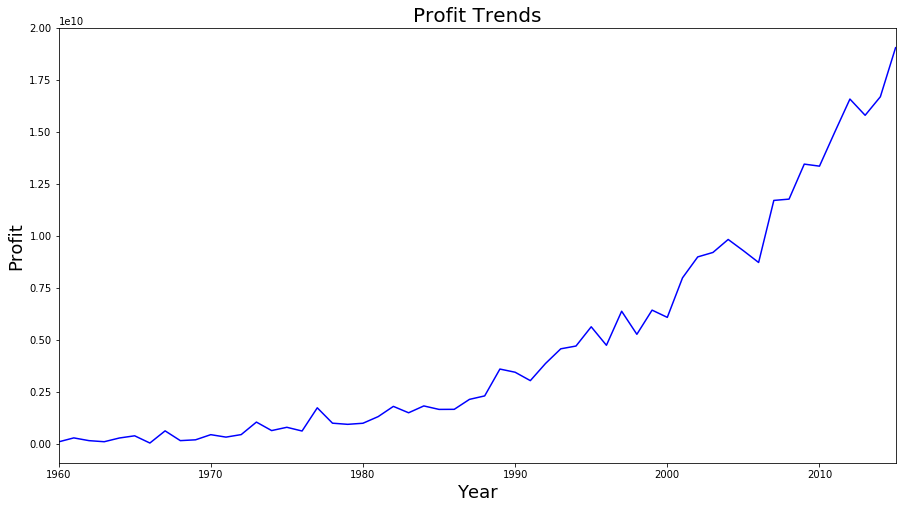

In [21]:
# Using the groupby function, calculating the sum and plotting the results
df.groupby('release_year')['profit'].sum().plot(kind = 'line',figsize = (15,8),color = 'b')
plt.title('Profit Trends',fontsize = 20)
plt.xlabel('Year',fontsize = 18)
plt.ylabel('Profit',fontsize = 18);

####  Average Runtime of Movie Over the Years?

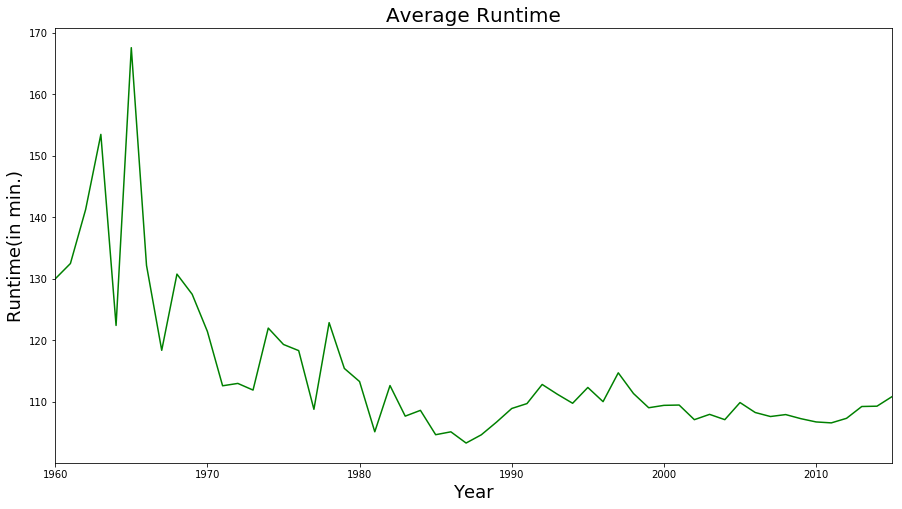

In [22]:
# Using the groupby function,calculating the mean() and plotting the results
df.groupby('release_year')['runtime'].mean().plot(kind = 'line',figsize = (15,8),color = 'g')
plt.title('Average Runtime',fontsize = 20)
plt.xlabel('Year',fontsize = 18)
plt.ylabel('Runtime(in min.)',fontsize = 18);

#### Which Movie has the Greatest And Least Budget?

In [23]:
# Calling the function
high_low('budget(in $)')

,2244,2618
budget(in $),425000000,1
revenue(in $),11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


#### Top 3 Cheapest and Expensive Profitable Movies

In [24]:
def Cheap_exp_profit(val):
 return df.query('profit > 50000000').sort_values('budget(in $)',ascending = val).head(3)

In [25]:
Cheap_exp_profit(False)

,budget(in $),revenue(in $),profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3375,380000000,1021683000,641683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136.0,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3,2011
7387,300000000,961000000,661000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169.0,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,2626,6.8,2007
14,280000000,1405035767,1125035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141.0,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015


In [26]:
Cheap_exp_profit(True)

,budget(in $),revenue(in $),profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
10495,113,115103979,115103866,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113.0,Adventure|Drama|Action|Romance|Family,Columbia Pictures Corporation|Delphi V Product...,1986-06-18,211,5.8,1986
7447,15000,193355800,193340800,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,86.0,Horror|Mystery,Blumhouse Productions|Solana Films,2007-09-14,714,6.1,2007
2449,25000,248000000,247975000,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,81.0,Horror|Mystery,Artisan Entertainment|Haxan Films,1999-07-14,522,6.3,1999


### B. What are the similar characteristics does the most profitable movie have?

In [27]:
# Function for Easy Code
def avg(col):

 #Calculating the mean and returning the result
 return df.query('profit > 50000000')[col].mean()

In [28]:
# Function for Easy Code
def value(col):
 # Convert column to string and seperate it by '|'
 data = df.query('profit > 50000000')[col].str.cat(sep = '|')

 # Storing the values seperately in a Pandas series
 data = pd.Series(data.split('|'))

 # Counting the data and arraging in descending order
 count = data.value_counts(ascending = False)

 return count


#### B1. Budget

In [29]:
# Calling the function
budget = avg('budget(in $)')
print('The Average Budget of a profitable movie is ${0:.1f}'.format(budget))

The Average Budget of a profitable movie is $60483360.9


#### B2. Cast

In [30]:
# Calling the function and storing the data in the variable
cast = value('cast')
# Top 5 Data
cast.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

#### B3. Director

In [31]:
# Calling the function and storing the data in the variable
director = value('director')
# Top 5 Data
director.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Tony Scott          10
dtype: int64

#### B4. Runtime

In [32]:
# Calling function
runtime = avg('runtime')
print('The Average Runtime of a profitable movie is {0:.1f} minutes.'.format(runtime))

The Average Runtime of a profitable movie is 113.6 minutes.


#### B5. Genres

In [33]:
# Calling the function
genres = value('genres')
genres

Comedy             492
Drama              480
Action             463
Thriller           404
Adventure          379
Family             229
Romance            215
Science Fiction    206
Fantasy            201
Crime              193
Horror             123
Animation          122
Mystery            112
Music               47
War                 46
History             39
Western             14
Documentary          4
dtype: int64

In [34]:
# Top 5 Genres
genres.head()

Comedy       492
Drama        480
Action       463
Thriller     404
Adventure    379
dtype: int64

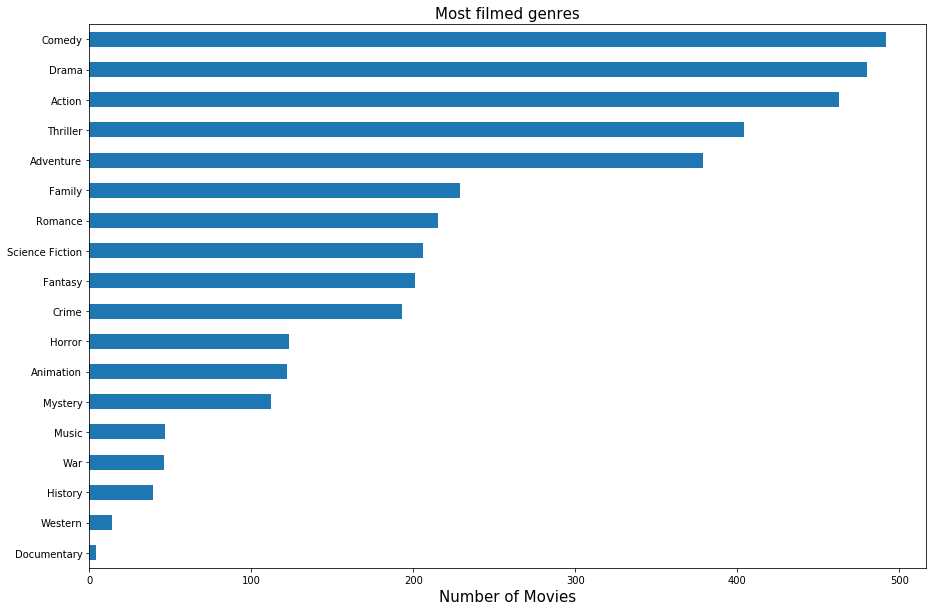

In [35]:
# Sorting the Genres in ascending Order and plotting the bar graph
genres.sort_values(ascending = True,inplace = True)
genres.plot(kind = 'barh',figsize = (15,10))
plt.title('Most filmed genres',fontsize = 15)
plt.xlabel('Number of Movies',fontsize = 15);

#### B6. Production Companies

In [36]:
# Calling the function and storing the data in the variable
pd_cmp = value('production_companies')
# Top 20 Data
pd_cmp.head(20)

Universal Pictures                        156
Warner Bros.                              144
Paramount Pictures                        130
Twentieth Century Fox Film Corporation    118
Columbia Pictures                          93
Walt Disney Pictures                       78
New Line Cinema                            67
Columbia Pictures Corporation              51
Relativity Media                           50
Touchstone Pictures                        46
DreamWorks SKG                             43
Metro-Goldwyn-Mayer (MGM)                  42
Amblin Entertainment                       40
Village Roadshow Pictures                  35
Dune Entertainment                         34
Regency Enterprises                        32
Fox 2000 Pictures                          26
DreamWorks Animation                       25
TriStar Pictures                           25
Legendary Pictures                         24
dtype: int64

In [37]:
# Top 5 Production Companies
pd_cmp.head(5)

Universal Pictures                        156
Warner Bros.                              144
Paramount Pictures                        130
Twentieth Century Fox Film Corporation    118
Columbia Pictures                          93
dtype: int64

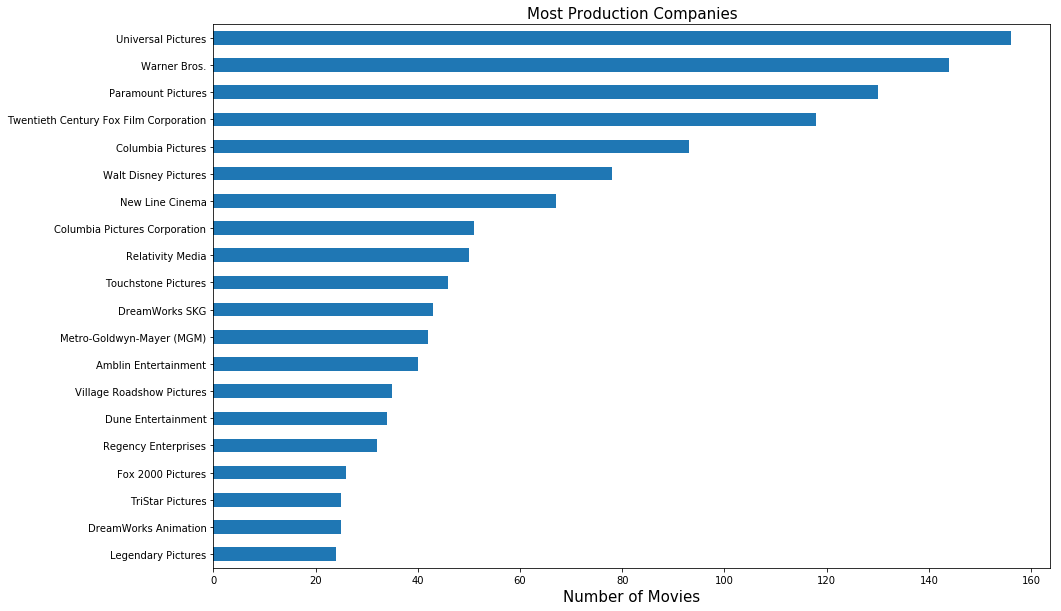

In [38]:
# Top 20 Production Companies
pd_cmp = pd_cmp.head(20)
# Sorting the values in ascending order and plotting the bar graph
pd_cmp.sort_values(ascending = True,inplace = True)
pd_cmp.plot(kind = 'barh',figsize = (15,10))
plt.title('Most Production Companies',fontsize = 15)
plt.xlabel('Number of Movies',fontsize = 15);

#### B7. Revenue

In [39]:
# calling the function
rev = avg('revenue(in $)')
print("The Average Revenue of Profitable Movie is: ${0:.1f}".format(rev))

The Average Revenue of Profitable Movie is: $251404908.8


In [40]:
df.shape

(3805, 13)

In [41]:
df = pd.read_csv(r"C:\\Users\\HP\\Downloads\\tmdb-movies-dataset\\tmdb_movies_data.csv",usecols=['original_title','cast','director','production_companies','genres'])
df.head()

,original_title,cast,director,genres,production_companies
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...


## Conclusions :-

##### From the above analysis,we can conclud that to have profitable/successful movies we should have:

In [ ]:
By doing this,the revenue of should be around $255 Million.